In [22]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Expressivity of QKN vs Classic NN

## Trajectory Length

In [23]:
theta = np.linspace(0, 2*np.pi, 1000)
theta = np.append(theta, theta[0:1]).reshape(-1,1)

x = np.pi*(np.cos(theta) + 1)/2
y = np.pi*(np.sin(theta) + 1)/2
x_qcn = np.hstack([x, y])
print(x_qcn.shape)
x_dnn = scaler(x_qcn, mode="standard")

(1001, 2)


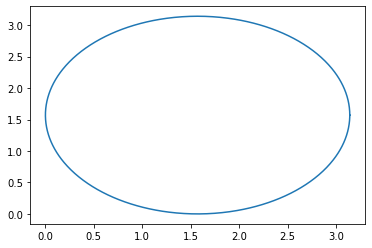

In [24]:
plt.plot(x_qcn[:,0], x_qcn[:,1])
plt.show()

## Quantum Circuit Network

### Increasing width

In [25]:
np.random.seed(42)

network = sequential_qnn(n_qubits = 8*[4],
                         dim = [2] + 7*[4],
                         scale = 8*[[-np.pi, np.pi]],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         shots = 0)

tl = TrajectoryLength(network)
a, b = tl.fit(x_qcn)
saver(tl, data_path("tl_expressivity_width_4_reps_2"))

In [39]:
np.random.seed(42)

network = sequential_qnn(n_qubits = 8*[5],
                         dim = [2] + 7*[5],
                         scale = 8*[[-np.pi, np.pi]],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 0)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_5_reps_2"))

  0%|          | 0/7 [00:00<?, ?it/s]

In [40]:
np.random.seed(42)

network = sequential_qnn(n_qubits = 8*[6],
                         dim = [2] + 7*[6],
                         scale = 8*[[-np.pi, np.pi]],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 0)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_6_reps_2"))

  0%|          | 0/7 [00:00<?, ?it/s]

In [41]:
np.random.seed(42)

network = sequential_qnn(n_qubits = 8*[7],
                         dim = [2] + 7*[7],
                         scale = 8*[[-np.pi, np.pi]],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 0)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_7_reps_2"))

  0%|          | 0/7 [00:00<?, ?it/s]

In [42]:
np.random.seed(42)

network = sequential_qnn(n_qubits = 8*[8],
                         dim = [2] + 7*[8],
                         scale = 8*[[-np.pi, np.pi]],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 0)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_8_reps_2"))

  0%|          | 0/7 [00:00<?, ?it/s]

### Increasing reps

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 2,
                         backend=backend,
                         shots=1000000)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_2_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 3,
                         backend=backend,
                         shots=1000000)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_3_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 4,
                         backend=backend,
                         shots=1000000)

network.predict(x_qcn, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_4_shots_1mill"))

## Classical Neural Network

In [33]:
network = sequential_dnn(dim=[2] + 7*[10])

network.predict(x_dnn, verbose=True)
saver(network, data_path("network_expressivity_width_4_dnn"))

  0%|          | 0/7 [00:00<?, ?it/s]